# Cubic splines

The file `cubic_splines.pdf` presents some notes about the cubic splines method.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#used for inserting images
from IPython.display import Image as img

In [2]:
def spline3(x, f):
    
    L = f.size
    
    g = 3.*np.hstack(((f[1] - f[0]), (f[2:] - f[:L-2]), (f[-1] - f[-2])))

    indices = np.arange(L)
    A = np.zeros((L,L))
    A[indices[1:L-1],indices[1:L-1]] = 4
    A[0,0] = 2
    A[L-1,L-1] = 2
    A[indices[:L-1],indices[1:]] = 1
    A[indices[1:],indices[:L-1]] = 1
    
    D = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, g))
    
    c = 3.*(f[1:] - f[:L-1]) - 2.*D[:L-1] - D[1:]
    d = 2.*(f[:L-1] - f[1:]) + D[:L-1] + D[1:]
    
    return D, c, d

In [3]:
def define_t(x, x0):
    L = x.size
    xmax = np.max(x)
    xmin = np.min(x)
    
    x_norm = (x - xmin)*(L-1)/(xmax - xmin)
    x0_norm = (x0 - xmin)*(L-1)/(xmax - xmin)
    
    t = []
    t_size = []
    i0 = 0
    for i, (xi, xi_plus) in enumerate(zip(x_norm[:L-1],x_norm[1:])): 
        mask = x0_norm[i0:] < xi_plus
        t.append(x0_norm[i0:][mask]-i)
        t_size.append(x0_norm[i0:][mask].size)
        i0 += t_size[i]

    t_size = np.array(t_size, dtype=int)
    t_mask = (t_size == 0)
    t_remove = np.arange(L-1, dtype=int)[t_mask]
    
    t_intervals = np.delete(np.arange(L-1, dtype=int),t_remove)
    
    return t, t_size, t_intervals

In [4]:
def spline3_interpolate3(a,b,c,d,x,x0):
    
    y0 = []
    
    t, t_size, t_intervals = define_t(x, x0)
    
    for (i, ti_size, ai, bi, ci, di) in zip(t_intervals, t_size[t_intervals], \
                                            a[t_intervals], b[t_intervals], \
                                            c[t_intervals],d[t_intervals]):

        y0i = np.zeros(ti_size) + ai
    
        e = t[i].copy()
        y0i += bi*e
            
        e = e*t[i]
        y0i += ci*e
        
        e = e*t[i]
        y0i += di*e
        
        y0.append(y0i)
        
    y0 = np.hstack(y0)

    return y0

In [5]:
def spline3_interpolate(a,b,c,d,t,x):
    
    y0 = np.empty((a.size,t.size))
    
    e = t.copy()
    
    for i, ai in enumerate(a):
        y0[i] = ai
    for i, bi in enumerate(b):
        y0[i] += bi*e
    e = e*t
    for i, ci in enumerate(c):
        y0[i] += ci*e
    e = e*t
    for i, di in enumerate(d):
        y0[i] += di*e
   
    y0 = np.ravel(y0)
    
    x0 = np.empty((a.size,t.size))
    for i in range(a.size):
        dx = x[i+1] - x[i]
        x0[i] = x[i] + dx*t
    x0 = np.ravel(x0)
    
    return x0, y0

In [6]:
L = 15

x = np.sort(np.random.rand(L)*L) # x coordinates of the data
y = np.sin(2.*np.pi*x/10.)       # data values

In [7]:
xmax = np.max(x)
xmin = np.min(x)

x0min = np.ceil(xmin)
x0max = np.floor(xmax)
nx0 = 10

x0 = np.linspace(x0min,x0max,nx0) # interpolating points
y0 = np.sin(2.*np.pi*x0/10.)      # true values of the original function at the interpolation points

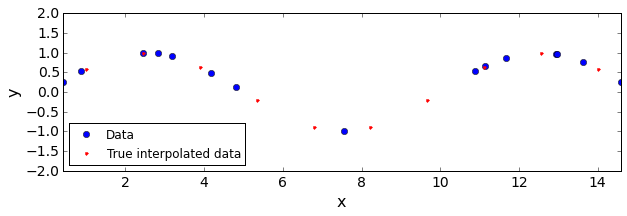

In [8]:
plt.close('all')
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'r.', label='True interpolated data')
plt.xlim(np.min([np.min(x0),np.min(x)]), np.max([np.max(x0),np.max(x)]))
plt.ylim(-2., 2.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=12)
plt.show()

In [9]:
t, t_size, t_intervals = define_t(x,x0)

In [10]:
t_intervals

array([ 1,  4,  6,  7,  8, 10, 13])

In [11]:
b,c,d = spline3(x,y)

In [12]:
y0_calc = spline3_interpolate3(y[:L-1],b[:L-1],c,d,x,x0)

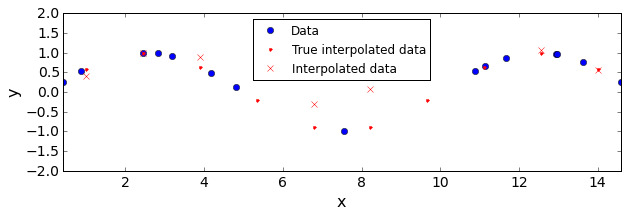

In [19]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'r.', label='True interpolated data')
plt.plot(x0, y0_calc, 'xr', label='Interpolated data')
plt.xlim(np.min([np.min(x0),np.min(x)]), np.max([np.max(x0),np.max(x)]))
plt.ylim(-2., 2.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=12)
plt.show()

### Exercise 25

The folder `synthetic_gravity_data` contains a jupyter notebook named [`synthetic_data_fatiando.ipynb`](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/synthetic_gravity_data/synthetic_data_fatiando.ipynb). This code uses the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/) for calculating the gravity anomaly produced by the following synthetic body:

In [ ]:
img('synthetic_gravity_data/model.png')

The synthetic body shown above produces the gravity anomaly shown below:

In [ ]:
img('synthetic_gravity_data/map.png')

In [ ]:
img('synthetic_gravity_data/profile.png')

The files `synthetic_gravity_data/gravity_anomaly.txt` and `synthetic_gravity_data/gravity_anomaly_profile.txt` contain, respectively, the synthetic gravity anomaly map and the gravity anomaly profile on x = 0 m.

To solve this exercise:

1. Load the file `synthetic_gravity_data/gravity_anomaly_profile.txt` by using the routine [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). 

2. Use the function `my_neville` to calculate one interpolated gravity data between two adjacent gravity data (black dots on the gravity profile) on the profile.

3. Plot a Figure similar to the gravity profile shown above containing: (i) the original data (black dots on the gravity profile) and (ii) the interpolated points.